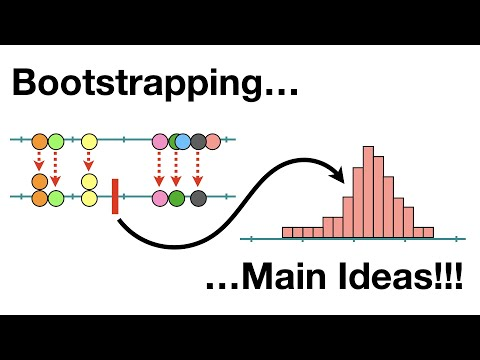

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

# Notes 
Bootstrapping main ideas:
- NOT efficent: Repeating the same experiment among the same group of people several times and taking the mean of it - this will give a histogram of a mean of values 
    - The mean values close to zero signify that the drug does not  while mean values that have larger deviaiton (either extremely left or right) mean that it is extremely rare/ drug does not do anything 
 
- BOOTSTRAPPING: 
    - choosing a random measurement at random, continously do this for all of the number of data 
    - selecting duplicates is called sampling with replacement 
    - new dataset is called bootstrap data set - now calculate the mean (could be median, standard deviation, etc) 
    - repeat this process for many times and add that to the mean of values (histogram) 
    - bootstrapping samples can usually be used with a computer, calcualting over thousands of samples 
    - histogram tells us how the mean might change 
    - knowing the standard error can be caulcualted by finding the standard deviation of this distrubtion 
    - Confidence interval: interval that covers a certian percent interval fo the bootstrapped means 
        - hypothesis testing 
    - Bootstrapping can be applied to any stats 

# Question 1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

The standard error of the mean means the likelihood of getting a rare piece of data (the variablity of the data) for MULTIPLE samples of a population, while standard deviation is directed to one single sample. To find the standard error, we find the standard deviation of the means - which are multiple samples of a single population. 

# Question 2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.

We could do this by using the mean and subtracting twice the standard error of the mean (as you need to subtract it from both sides - high and low extremes). 

# Question 3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.

We can estimate by finding the means in a interval that covers 95% of it. Since each side should not include 2.5% of the means, we can find the means between the interval of 2.5% and 97.5%. 

# Question 4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

Based on population mean: 

In [2]:
import numpy as np

# Function to compute a bootstrap confidence interval for the mean
def bootstrap_confidence_interval(data, num_bootstrap_samples=10000, ci_level=95):
    """
    This function calculates a bootstrap confidence interval for the mean of the given data.
    
    Parameters:
    data: The sample data (list or numpy array).
    num_bootstrap_samples: Number of bootstrap samples to generate (default is 10,000).
    ci_level: The confidence level for the interval (default is 95%).
    
    Returns:
    A tuple containing the lower and upper bounds of the confidence interval.
    """
    # Get number of data points
    n = len(data)
    
    # Generate bootstrap samples and calculate the mean of each sample
    bootstrap_means = np.empty(num_bootstrap_samples)
    for i in range(num_bootstrap_samples):
        # Resample with replacement from the data
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        # Calculate the mean of the bootstrap sample
        bootstrap_means[i] = np.mean(bootstrap_sample)
    
    # Calculate the percentiles for the confidence interval
    lower_percentile = (100 - ci_level) / 2
    upper_percentile = 100 - lower_percentile
    ci_lower = np.percentile(bootstrap_means, lower_percentile)
    ci_upper = np.percentile(bootstrap_means, upper_percentile)
    
    return ci_lower, ci_upper

# Example usage
data = np.array([12, 15, 14, 10, 13, 11, 16, 14, 13, 12])  # Replace this with your sample data
ci = bootstrap_confidence_interval(data)
print(f"95% Bootstrap Confidence Interval for the Mean: {ci}")


95% Bootstrap Confidence Interval for the Mean: (11.9, 14.1)


Based on population median: 

In [3]:
import numpy as np

# Function to compute a bootstrap confidence interval for the median
def bootstrap_confidence_interval_median(data, num_bootstrap_samples=10000, ci_level=95):
    """
    This function calculates a bootstrap confidence interval for the median of the given data.
    
    Parameters:
    data: The sample data (list or numpy array).
    num_bootstrap_samples: Number of bootstrap samples to generate (default is 10,000).
    ci_level: The confidence level for the interval (default is 95%).
    
    Returns:
    A tuple containing the lower and upper bounds of the confidence interval.
    """
    # Get number of data points
    n = len(data)
    
    # Generate bootstrap samples and calculate the median of each sample
    bootstrap_medians = np.empty(num_bootstrap_samples)
    for i in range(num_bootstrap_samples):
        # Resample with replacement from the data
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        # Calculate the median of the bootstrap sample
        bootstrap_medians[i] = np.median(bootstrap_sample)
    
    # Calculate the percentiles for the confidence interval
    lower_percentile = (100 - ci_level) / 2
    upper_percentile = 100 - lower_percentile
    ci_lower = np.percentile(bootstrap_medians, lower_percentile)
    ci_upper = np.percentile(bootstrap_medians, upper_percentile)
    
    return ci_lower, ci_upper

# Example usage
ci_median = bootstrap_confidence_interval_median(data)
print(f"95% Bootstrap Confidence Interval for the Median: {ci_median}")


95% Bootstrap Confidence Interval for the Median: (11.5, 14.5)


Difference: the data we are using is changed, so when iterating to pick random values, we are randomly selecting median instead of means. 

Link to ChatGPT : https://chatgpt.com/share/66fb6f69-80a4-800a-9c98-e57d0752cfd6

# Question 5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample statistic when it comes to confidence intervals? Explain this concisely in your own words.

A population paramter is a paramter measure that describes an entire population, while sample statistic refers to a statistic based on a sample. In this case, it is important to distingush it because a sample statistic only calculates the behavior of the population, and may not be accurate for the entire population. 

# Question 6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.

1. What is the process of bootstrapping?
The process of bootstrapping is taking a sample of a population and collecting samples of data from the same sample, then calculating the mean of that data. Then, data is randomly selected (with the same sample size) in the sample, where the mean is once again calculated. This process is done n number of times, until there are many means that can accurately imitate the behaviour of a entire population. The larger n is, the more accurate it is. 

2. What is the main purpose of bootstrapping?
To calcualte the behaviour of a population with less effort - instead of getting a large amount of people to obtain data to make it accurate, we can get a small amount of people (easier!). 

3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
I can see if the values that occur the most often from bootstrapping are closer to zero, or if they deviate away from it. If it is closer to zero, then it tells me that my hypothesis is wrong to apply to the entire population 

# Question 7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.

Because it mentions ON AVERAGE, which means that although it may work sometimes, it usually does not work. This hypothesis cannot be rejected as because the confidence interval crosses zero, that means there does exist at least a case in which the drug did not work, so this hypothesis may be true. To have the opposite conclusion, the confidence interval must not ever cross zero, so that it shows that there has never been a case that the drug did not work, in which case this hypothesis would be false. 

# Question 8. Complete the following assignment.

Null Hypothesis: Because the confidence interval covers 0, on average the health of the people who take the vaccine made by AliTech does not improve 

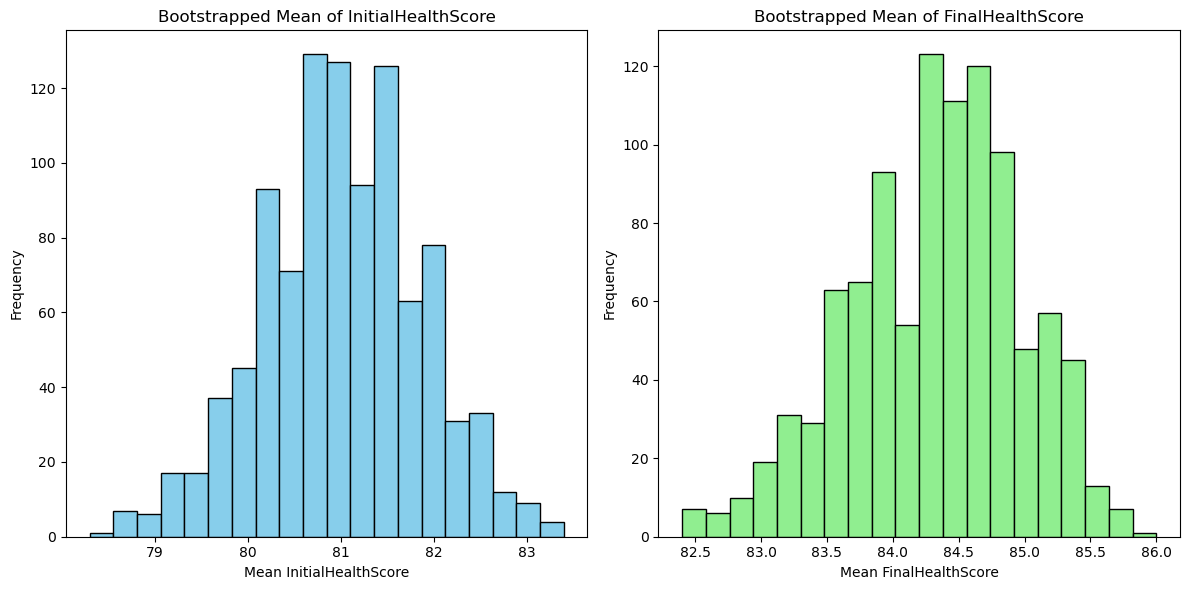

Bootstrapped Mean of InitialHealthScore and FinalHealthScore: [81.0107 84.3182]
95% Confidence Interval for InitialHealthScore and FinalHealthScore: [[79.2    83.    ]
 [82.6025 85.4   ]]


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the CSV data as a string (or load from CSV)
data = '''PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
1,45,M,84,86
2,34,F,78,86
3,29,M,83,80
4,52,F,81,86
5,37,M,81,84
6,41,F,80,86
7,33,M,79,86
8,48,F,85,82
9,26,M,76,83
10,39,F,83,84
'''

# Load the CSV data into a Pandas DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data))

np.random.seed(42)

# Function to perform bootstrapping
def bootstrap(data, num_bootstrap_samples, stat_func):
    bootstrap_stats = []
    for _ in range(num_bootstrap_samples):
        # Sample with replacement
        sample = data.sample(frac=1, replace=True)
        # Compute the statistic on the resampled data
        stat = stat_func(sample)
        bootstrap_stats.append(stat)
    return np.array(bootstrap_stats)

# Define the statistic function (mean InitialHealthScore and FinalHealthScore)
def stat_func(data):
    return data[['InitialHealthScore', 'FinalHealthScore']].mean()

# Perform bootstrapping with 1000 samples
bootstrap_samples = 1000
bootstrap_results = bootstrap(df, bootstrap_samples, stat_func)

# Plot histograms for the bootstrapped InitialHealthScore and FinalHealthScore
plt.figure(figsize=(12, 6))

# Histogram for InitialHealthScore
plt.subplot(1, 2, 1)
plt.hist(bootstrap_results[:, 0], bins=20, color='skyblue', edgecolor='black')
plt.title('Bootstrapped Mean of InitialHealthScore')
plt.xlabel('Mean InitialHealthScore')
plt.ylabel('Frequency')

# Histogram for FinalHealthScore
plt.subplot(1, 2, 2)
plt.hist(bootstrap_results[:, 1], bins=20, color='lightgreen', edgecolor='black')
plt.title('Bootstrapped Mean of FinalHealthScore')
plt.xlabel('Mean FinalHealthScore')
plt.ylabel('Frequency')

# Display the histograms
plt.tight_layout()
plt.show()

mean_bootstrap = bootstrap_results.mean(axis=0)
confidence_interval = np.percentile(bootstrap_results, [2.5, 97.5], axis=0)

# Display the results
print(f"Bootstrapped Mean of InitialHealthScore and FinalHealthScore: {mean_bootstrap}")
print(f"95% Confidence Interval for InitialHealthScore and FinalHealthScore: {confidence_interval}")

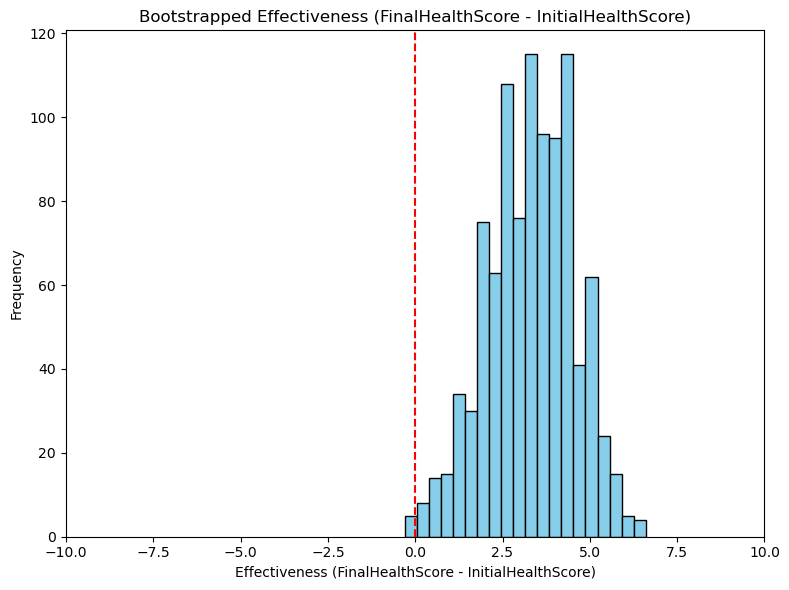

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the CSV data as a string (or load from CSV)
data = '''PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
1,45,M,84,86
2,34,F,78,86
3,29,M,83,80
4,52,F,81,86
5,37,M,81,84
6,41,F,80,86
7,33,M,79,86
8,48,F,85,82
9,26,M,76,83
10,39,F,83,84
'''

# Load the CSV data into a Pandas DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data))

# Set random seed for reproducibility
np.random.seed(42)

# Function to perform bootstrapping
def bootstrap(data, num_bootstrap_samples, stat_func):
    bootstrap_stats = []
    for _ in range(num_bootstrap_samples):
        # Sample with replacement
        sample = data.sample(frac=1, replace=True)
        # Compute the statistic on the resampled data
        stat = stat_func(sample)
        bootstrap_stats.append(stat)
    return np.array(bootstrap_stats)

# Define the statistic function (calculate effectiveness: FinalHealthScore - InitialHealthScore)
def stat_func(data):
    return (data['FinalHealthScore'] - data['InitialHealthScore']).mean()

# Perform bootstrapping with 1000 samples
bootstrap_samples = 1000
bootstrap_results = bootstrap(df, bootstrap_samples, stat_func)

# Plot histogram for the bootstrapped effectiveness (FinalHealthScore - InitialHealthScore)
plt.figure(figsize=(8, 6))

# Histogram for effectiveness with bins centered around 0
plt.hist(bootstrap_results, bins=20, color='skyblue', edgecolor='black')
plt.axvline(0, color='red', linestyle='--')  # Add a vertical line at 0
plt.title('Bootstrapped Effectiveness (FinalHealthScore - InitialHealthScore)')
plt.xlabel('Effectiveness (FinalHealthScore - InitialHealthScore)')
plt.ylabel('Frequency')

# Adjust the x-axis limits to center around 0
plt.xlim([-10, 10])

# Display the histogram
plt.tight_layout()
plt.show()

Here, we can see that the effectiveness is to the right of the graph, signifying that there were some imporvements in most people's health. Since the confidence interval of 95% does NOT cover 0, it shows that we can reject the null hypothesis. 

ChatGPT link: https://chatgpt.com/share/66fb74b1-6810-800a-a6b0-f010486fa30b

# Question 9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Somewhat 